# Exposure Time Calculator tutorial


In [1]:
# Allows interactive plot within this notebook
%matplotlib notebook

# Allows to take into account modifications made in the source code without having to restart the notebook
%reload_ext autoreload
%autoreload 2

# Telescope configuration Files

First you need to define the caracteristics of your telescope in a hjson file. This file must be in pyETC/pyETC/telescope_database/.

This file contains all caracteristics of the telescope and its environment you do not need to modify for different observations. (Size of the mirrors, number ad type of lenses, mirrors..., sky background, atmosphere transmission, cameras caracteristics,...)

For instance for the COLIBRI: [COLIBRI.hjson](../pyETC/telescope_database/COLIBRI.hjson)

# ETC configuration File 

The ETC configuration file contains information related to the conditions of an observation: moon age, target elevation, seeing, filter band to use, exposure time, number of exposures...

An example of configuration file can be found in in pyETC/pyETC/configFiles: [example.hjson](../pyETC/configFiles/example.hjson)



# Simple user cases

## 1) Illustrative example

In order to compute the limiting magnitudes you need to define a SNR and an exposure time

In [2]:
# Load os package, in order to get the environment variable GFT_SIM
import os

# Load ETC package
from pyETC.pyETC import etc

In [3]:
# load ETC with a config file and the COLIBRI caracteristics
COLIBRI_ETC=etc(configFile=os.getenv('pyETC_DIR')+'/pyETC/configFiles/example.hjson',name_telescope='COLIBRI')


Information about Passband:
----------------------------
Cut_on: 5495 angstroms
Effective wavelength: 6199 angstroms
Cut_off: 6895 angstroms

Airmass: 1.50

Seeing: 1.22

MEAN EFFICENCIES:
------------------
Obscuration: 0.801
Telescope: 0.569 (+obs: 0.456)
Instrument: 0.666
Optics (tel+inst): 0.379  (+obs: 0.304)
Filter: 0.850
Atmosphere: 0.887
Camera: 0.907
System: 0.379 (+obs: 0.304)

Zeropoint: 24.12 (AB mag)


A magnitude (AB system) of 9.81 in r band within a total exposure time of 5.00 seconds splited in 1 exposure(s), implies a total SNR of :

	 - Integrated SNR over 1 pixels: 1375.86


A magnitude (AB system) of 9.81 in r band within a total exposure time of 5.00 seconds splited in 1 exposure(s), implies a SNR for the central pixel of of :


	 - SNR of the central pixel: 1429.23 



Full well capacity of 1 pixel: 350000.00 (electrons)


--------- One pixel only------------------

Photo-electrons created: central pix for 1 exposure(s) of 5.00 sec 
	by:
	- Object:         20428

<IPython.core.display.Javascript object>


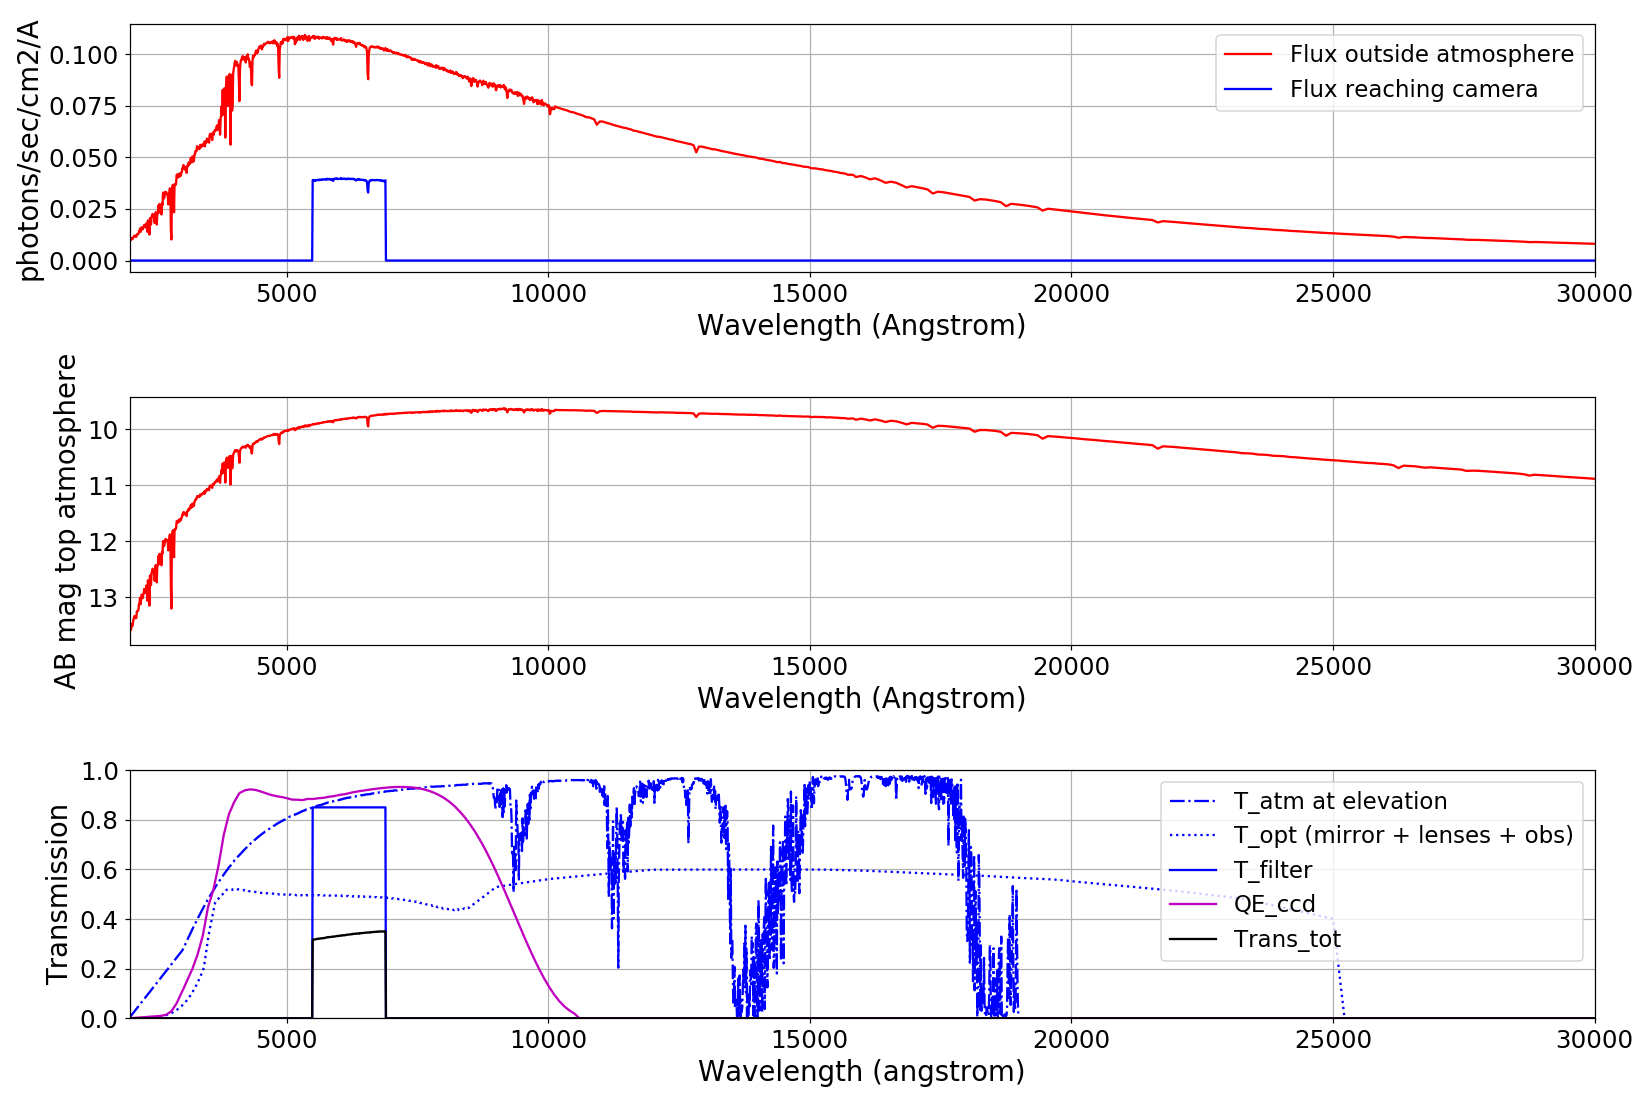

In [4]:
# Execute
COLIBRI_ETC.sim()

The plots and results displayed here are also saved in a .txt file in pyETC/results/results_summary.txt

The main idea of the ETC is that all information are stored in a dictionnary named "information".
If you want to know the whole content just write:

In [5]:
COLIBRI_ETC.information

OrderedDict([('sky_site', 'OAN_Ratir_X1.5'),
             ('atmosphere_type', 'file'),
             ('ext_file', 'OAN_extinction'),
             ('atm_file', 'OAN_atm_trans'),
             ('D_M1', 1.3),
             ('D_M2', 0.58),
             ('M2_factor', 1),
             ('focal_length',
              OrderedDict([('DDRAGO-B', 8.124),
                           ('DDRAGO-R', 8.124),
                           ('CAGIRE', 4.874)])),
             ('Fwhm_psf_opt',
              OrderedDict([('g', 0.26),
                           ('r', 0.26),
                           ('i', 0.37),
                           ('z', 0.37),
                           ('y', 0.37),
                           ('J', 0.59),
                           ('H', 0.73),
                           ('gri', 0.3),
                           ('zy', 0.37),
                           ('V', 0.26),
                           ('R', 0.37)])),
             ('detailed_trans', 1),
             ('filter_folder', 'COLIBRI'),
       

If you want to get the value of one parameter, for instance the computed magnitude, just write:

In [6]:
COLIBRI_ETC.information['mag']

9.8116704128151309

If you want to modify some parameters, there are 2 possibilities:   
- either modify the hjson configFile     
- or directly change the parameters value in the "information" dictionary. This is useful when the ETC is used in a python script interacting with other python packages.

For instance, we want to change the exposure time, SNR, seeing, elevation of the target, age of the moon without modifying the input file: 

In [7]:
# Modify the exposure time
COLIBRI_ETC.information["exptime"] = 60

# Change the number of expositions
COLIBRI_ETC.information['Nexp'] = 3

# Change the seeing at the zenith, in arcseconds
COLIBRI_ETC.information["seeing_zenith"] =1.2

# Change the elevation of the target, in degrees 
COLIBRI_ETC.information['elevation'] = 78

#Change the age of the moon
COLIBRI_ETC.information["moon_age"] = 2


Information about Passband:
----------------------------
Cut_on: 5495 angstroms
Effective wavelength: 6199 angstroms
Cut_off: 6895 angstroms

Airmass: 1.02

Seeing: 1.16

MEAN EFFICENCIES:
------------------
Obscuration: 0.801
Telescope: 0.569 (+obs: 0.456)
Instrument: 0.666
Optics (tel+inst): 0.379  (+obs: 0.304)
Filter: 0.850
Atmosphere: 0.887
Camera: 0.907
System: 0.379 (+obs: 0.304)

Zeropoint: 24.12 (AB mag)


A magnitude (AB system) of 9.81 in r band within a total exposure time of 180.00 seconds splited in 3 exposure(s), implies a total SNR of :

	 - Integrated SNR over 1 pixels: 8255.32


A magnitude (AB system) of 9.81 in r band within a total exposure time of 180.00 seconds splited in 3 exposure(s), implies a SNR for the central pixel of of :


	 - SNR of the central pixel: 8575.55 



Full well capacity of 1 pixel: 350000.00 (electrons)


--------- One pixel only------------------

Photo-electrons created: central pix for 3 exposure(s) of 60.00 sec 
	by:
	- Object:         

<IPython.core.display.Javascript object>


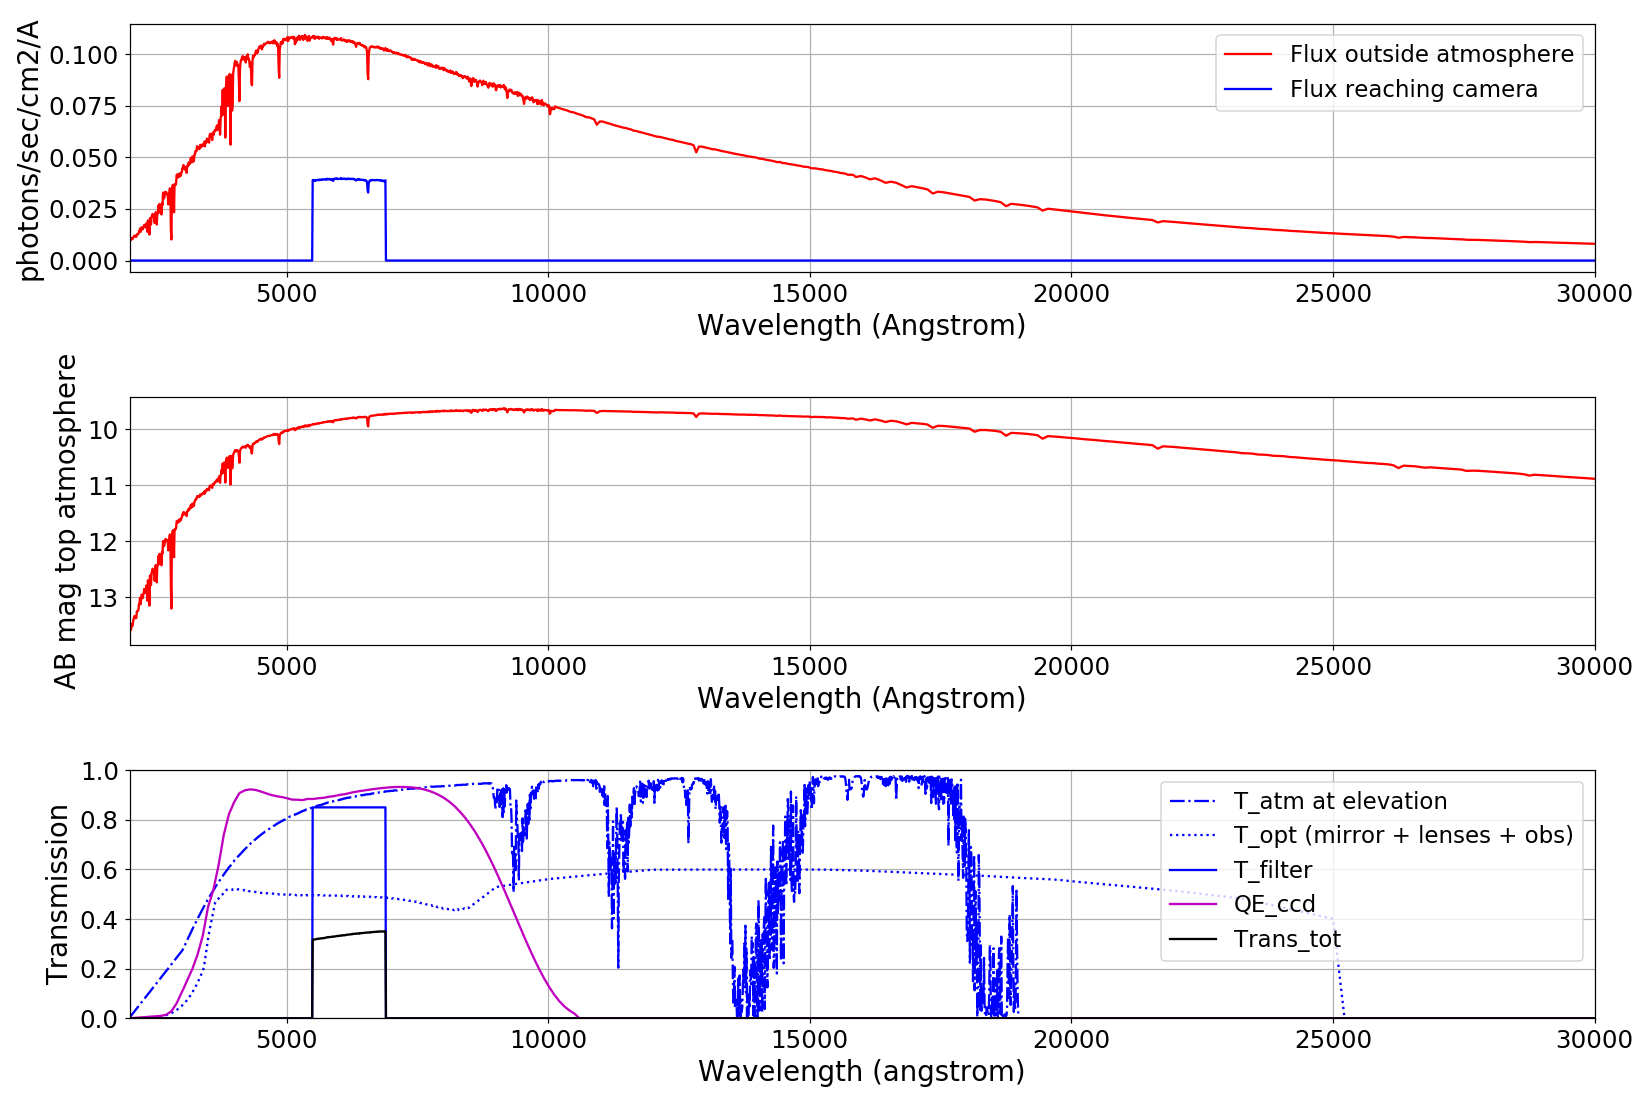

In [8]:
# Execute again
COLIBRI_ETC.sim()

In the case of COLIBRI, there 3 channels and one might want to use one NIR band. You just need to specify the channel to use and the filter band, for instance the J band:

In [9]:
# Select the J filter band
COLIBRI_ETC.information["filter_band"] = 'J'

# Specify the NIR channel in order to load the NIR channel caracterisitcs (optics transmissions + camera carac.)
COLIBRI_ETC.information["channel"] = 'CAGIRE'


Information about Passband:
----------------------------
Cut_on: 11696 angstroms
Effective wavelength: 12509 angstroms
Cut_off: 13304 angstroms

Airmass: 1.02

Seeing: 1.01

MEAN EFFICENCIES:
------------------
Obscuration: 0.801
Telescope: 0.693 (+obs: 0.555)
Instrument: 0.469
Optics (tel+inst): 0.325  (+obs: 0.260)
Filter: 0.850
Atmosphere: 0.932
Camera: 0.690
System: 0.325 (+obs: 0.260)

Zeropoint: 23.39 (AB mag)


A magnitude (AB system) of 9.70 in J band within a total exposure time of 180.00 seconds splited in 3 exposure(s), implies a total SNR of :

	 - Integrated SNR over 2 pixels: 6205.57


A magnitude (AB system) of 9.70 in J band within a total exposure time of 180.00 seconds splited in 3 exposure(s), implies a SNR for the central pixel of of :


	 - SNR of the central pixel: 5444.16 



Full well capacity of 1 pixel: 80000.00 (electrons)


--------- One pixel only------------------

Photo-electrons created: central pix for 3 exposure(s) of 60.00 sec 
	by:
	- Object:       

<IPython.core.display.Javascript object>


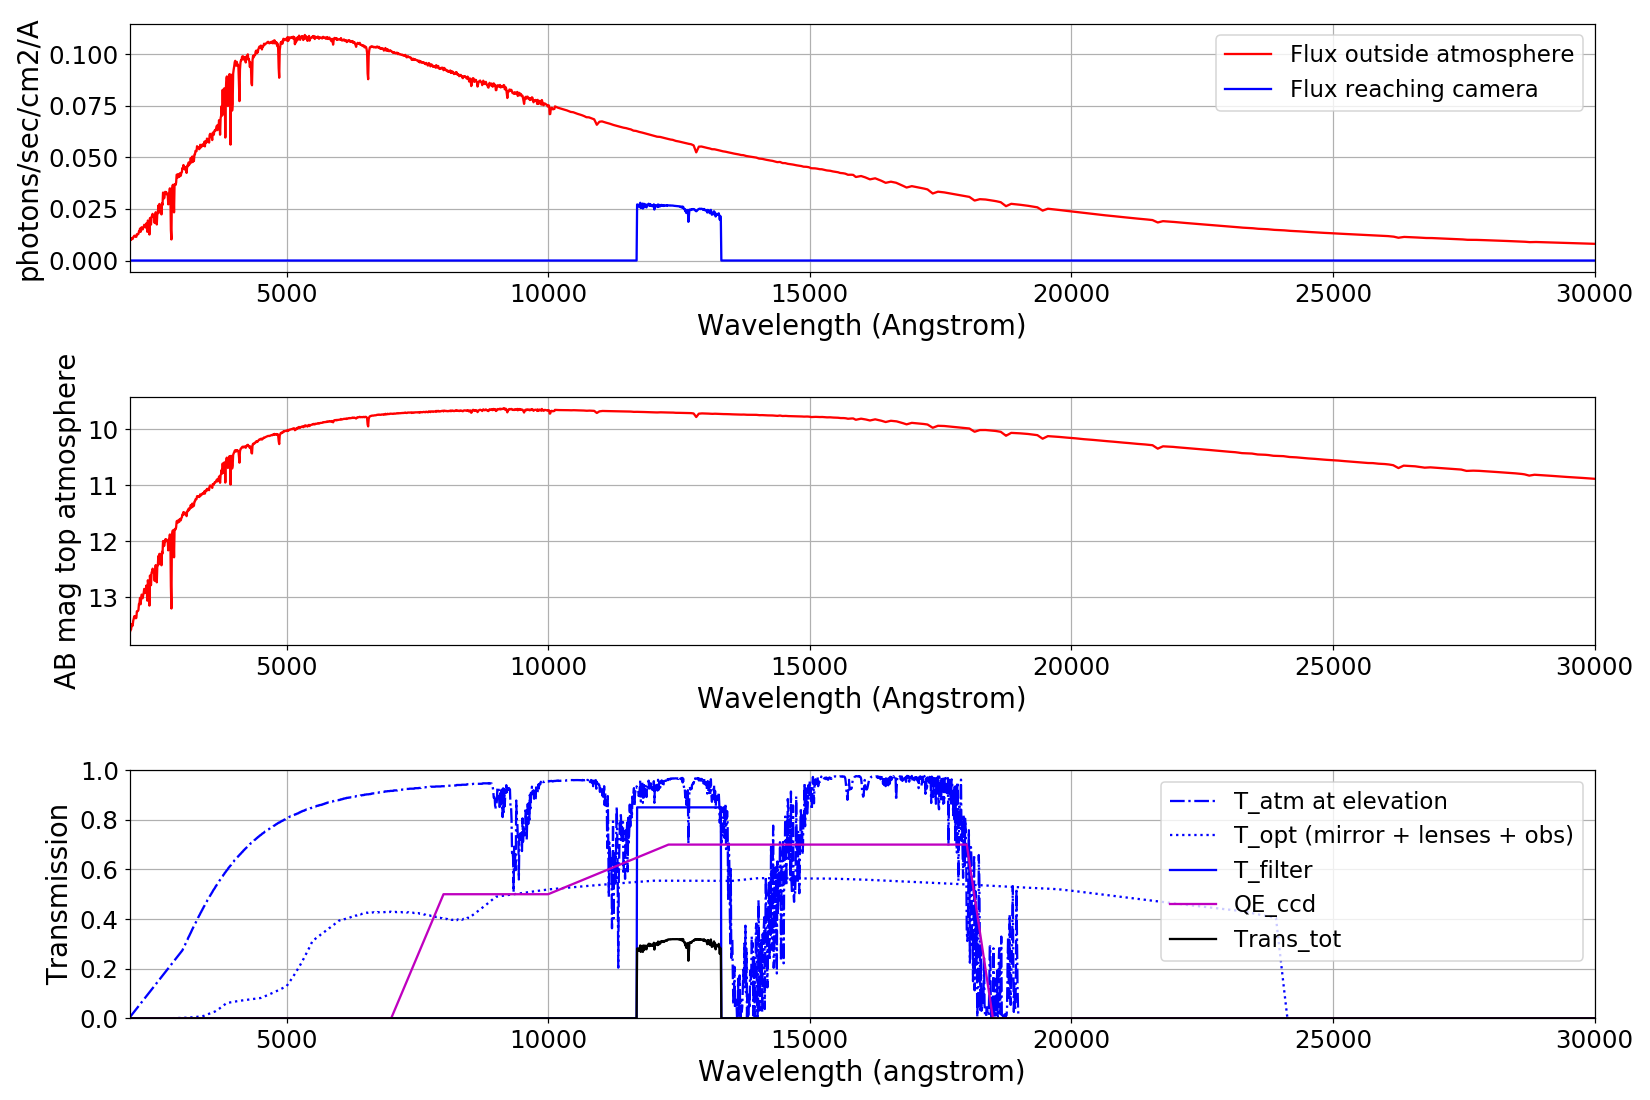

In [10]:
# Execute again
COLIBRI_ETC.sim()

## 2) Compute the SNR for a given magnitude (or spectrum) and a exposure time

### 2.1) For a given magnitude

To compute the SNR for a Vega magnitude of 18 and a single exposure of 5s, we need to modify in the hjson configFile:   
"etc_type": snr   
"object_type": magnitude   
"object_magnitude": 18   
"exptime": 5   
"photometry_system": Vega   

 
Here we rather update the dictionary to avoid to use too many configFiles.   


In [11]:
# Now we want to compute the SNR
COLIBRI_ETC.information['etc_type'] = 'snr'

# Set up the object: either 'magnitude' for a constant magnitude,
# or 'spectrum' for a given spectrum in the database,
# or 'grb_sim' to ompute the grb spectrum
COLIBRI_ETC.information['object_type'] = 'magnitude'

# If we select 'magnitude', we need to define the object magnitude 
COLIBRI_ETC.information['object_magnitude'] = 18

# Set an exposure time of 5s
COLIBRI_ETC.information['exptime'] = 5

# Use Vega system
COLIBRI_ETC.information['photometry_system'] = 'Vega'




Information about Passband:
----------------------------
Cut_on: 11696 angstroms
Effective wavelength: 12509 angstroms
Cut_off: 13304 angstroms

Airmass: 1.02

Seeing: 1.01

MEAN EFFICENCIES:
------------------
Obscuration: 0.801
Telescope: 0.693 (+obs: 0.555)
Instrument: 0.469
Optics (tel+inst): 0.325  (+obs: 0.260)
Filter: 0.850
Atmosphere: 0.932
Camera: 0.690
System: 0.325 (+obs: 0.260)

Zeropoint: 22.48 (Vega mag)


A magnitude (Vega system) of 18.00 in J band within a total exposure time of 15.00 seconds splited in 3 exposure(s), implies a total SNR of :

	 - Integrated SNR over 2 pixels: 7.40


A magnitude (Vega system) of 18.00 in J band within a total exposure time of 15.00 seconds splited in 3 exposure(s), implies a SNR for the central pixel of of :


	 - SNR of the central pixel: 7.88 



Full well capacity of 1 pixel: 80000.00 (electrons)


--------- One pixel only------------------

Photo-electrons created: central pix for 3 exposure(s) of 5.00 sec 
	by:
	- Object:        

<IPython.core.display.Javascript object>


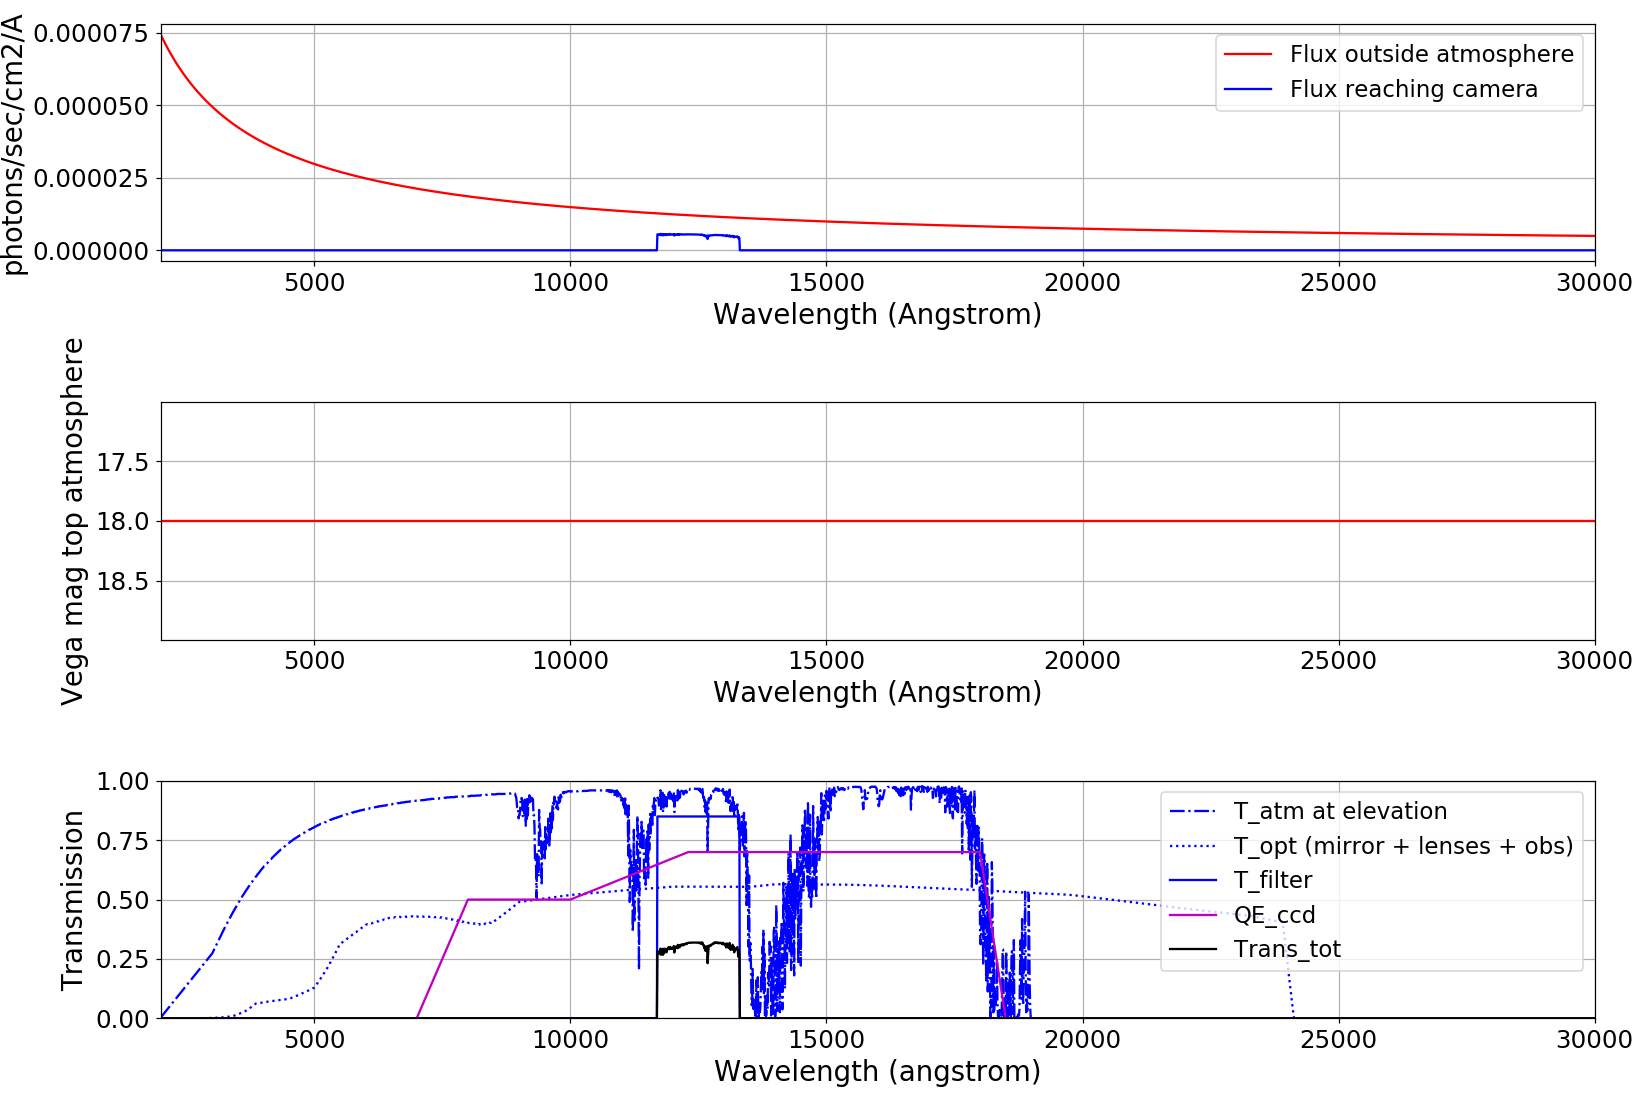

In [12]:
# Execute
COLIBRI_ETC.sim()

### 2.2) For a given spectrum

The spectrum is stored in /data/   
Wavelength are in Angstoms and fluxes in erg/s/cm2/A 

In [13]:
# Specify that the object is a spectrum
COLIBRI_ETC.information['object_type'] = 'spectrum'

# Define the folder. Starting from pyETC/pyETC directory
COLIBRI_ETC.information['object_folder'] = '/data/calspec/'

# Define the file in this folder
COLIBRI_ETC.information['object_file'] = 'bd02d3375_stis_001.txt'

#COLIBRI_ETC.information['object_folder'] = '/data/'
#COLIBRI_ETC.information['object_file']='bohlin2006_Vega.dat'


# Modify the exposure time
COLIBRI_ETC.information["exptime"] = 5

# Change the number of expositions
COLIBRI_ETC.information['Nexp'] = 3

# Change the seeing at the zenith, in arcseconds
COLIBRI_ETC.information["seeing_zenith"] = 0.79

# Change the elevation of the target 
COLIBRI_ETC.information['elevation'] = 78

#Change the age of the moon
COLIBRI_ETC.information["moon_age"] = 7

# Specify the channel
COLIBRI_ETC.information["channel"]= 'DDRAGO-R'

# Select the z filter band
COLIBRI_ETC.information["filter_band"] = 'z'

# Use AB system
COLIBRI_ETC.information['photometry_system'] = 'AB'


Information about Passband:
----------------------------
Cut_on: 8185 angstroms
Effective wavelength: 8680 angstroms
Cut_off: 9223 angstroms

Airmass: 1.02

Seeing: 0.72

MEAN EFFICENCIES:
------------------
Obscuration: 0.801
Telescope: 0.559 (+obs: 0.448)
Instrument: 0.513
Optics (tel+inst): 0.287  (+obs: 0.230)
Filter: 0.850
Atmosphere: 0.929
Camera: 0.701
System: 0.287 (+obs: 0.230)

Zeropoint: 23.16 (AB mag)


A magnitude (AB system) of 9.66 in z band within a total exposure time of 15.00 seconds splited in 3 exposure(s), implies a total SNR of :

	 - Integrated SNR over 2 pixels: 1650.20


A magnitude (AB system) of 9.66 in z band within a total exposure time of 15.00 seconds splited in 3 exposure(s), implies a SNR for the central pixel of of :


	 - SNR of the central pixel: 1405.39 



Full well capacity of 1 pixel: 350000.00 (electrons)


--------- One pixel only------------------

Photo-electrons created: central pix for 3 exposure(s) of 5.00 sec 
	by:
	- Object:          65

<IPython.core.display.Javascript object>


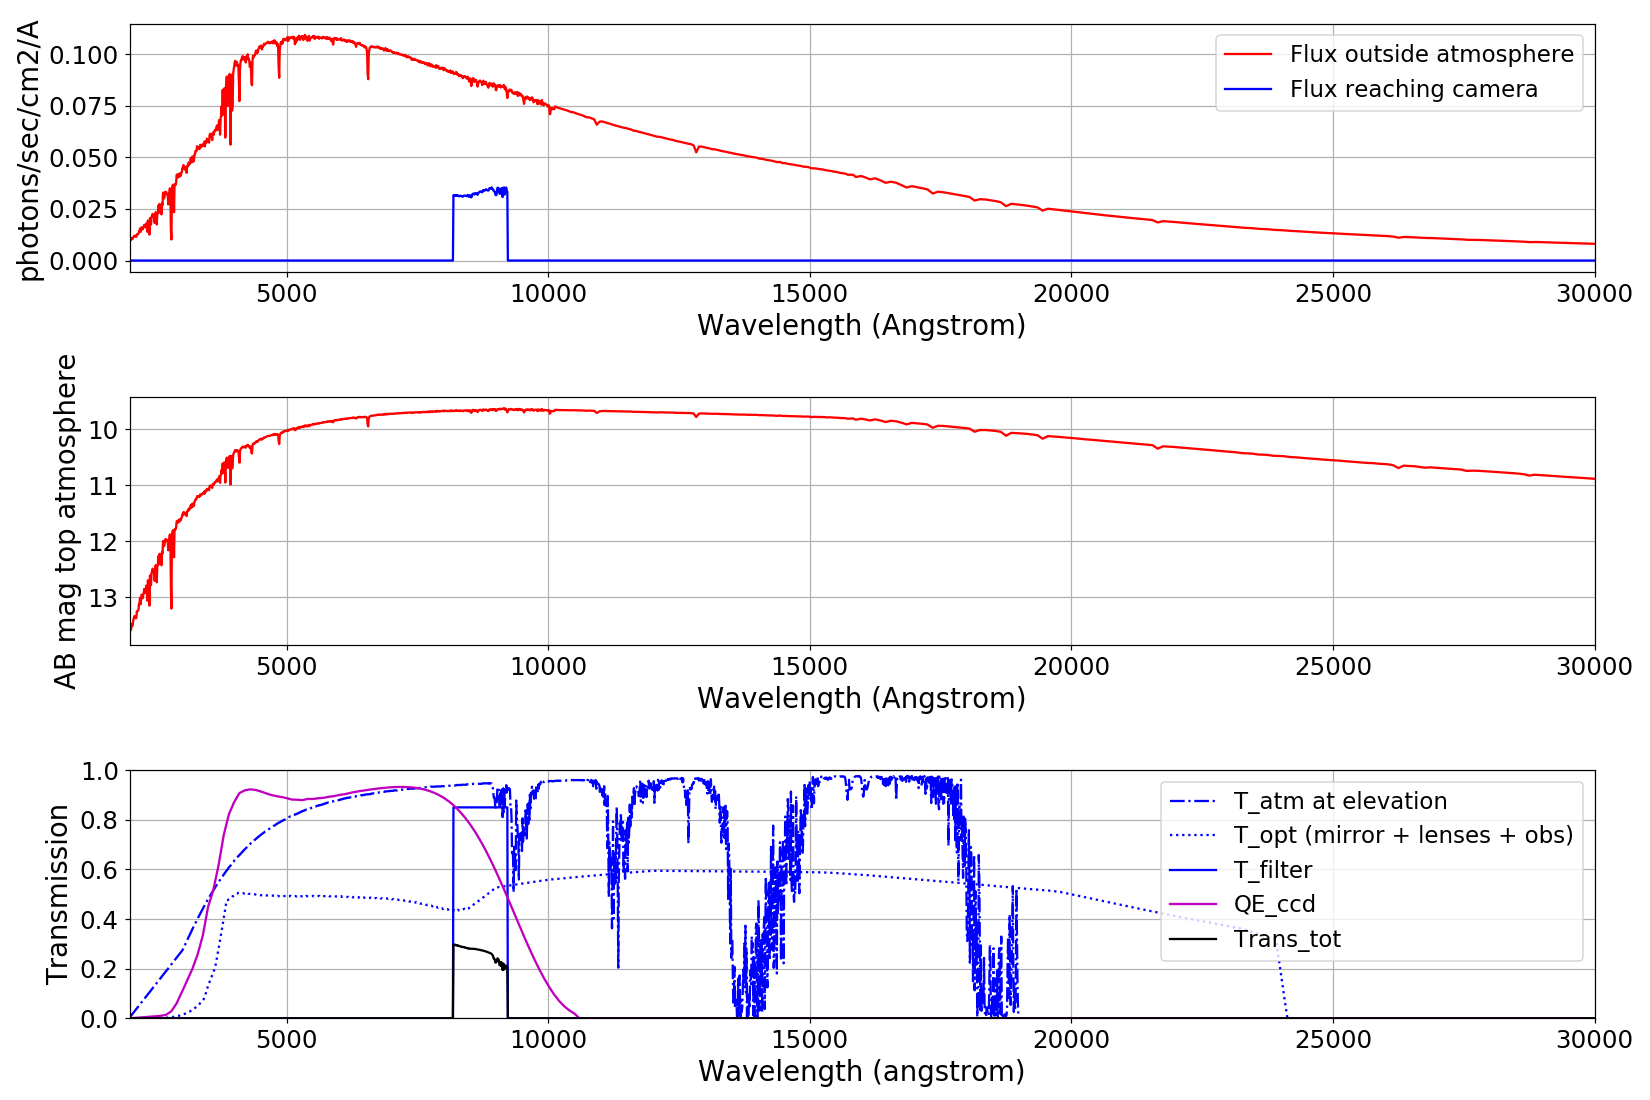

In [14]:
# Execute
COLIBRI_ETC.sim()

### 2.3) For a simulated GRB spectrum 

(Required pyGRBaglow python package)

GRB spectrum can be simulated with:   
- empirical model: single power law, broken power law
- theoretical model: synchrotron model of Granot & Sari 2002

In the following we use the theoretical model.  
In the following we update the dictionary, but one can also load the tuto_grb_sim.hjson configFile.

In [15]:
# First we specify that the object is a simulated GRB spectrum
COLIBRI_ETC.information['object_type'] = 'grb_sim'

# Specify the GRB model to use
COLIBRI_ETC.information['grb_model'] = 'gs02'

# Redshift
COLIBRI_ETC.information['grb_redshift'] = 3

# Time (in days)
COLIBRI_ETC.information['t_sinceBurst'] = 0.2

# Equivalent isotropic energy
COLIBRI_ETC.information['E_iso'] = 1e53

# Gamma-ray radiative efficiency
COLIBRI_ETC.information['eta'] = 0.3

# fraction of the internal energy given to the magnetic field in the Forward Shock
COLIBRI_ETC.information['eps_b'] = 1e-4

# fraction of the internal energy given to the electrons accelerated into the Forward Shock
COLIBRI_ETC.information['eps_e'] = 0.1

# index of the energy distribution of the shocked accelerated electrons
COLIBRI_ETC.information['p'] = 2.2

# interstellar medium density (in cm3)
COLIBRI_ETC.information['n0'] = 1

# Inverse Compton parameter, to take into account the Inverse Compton effects on the cooling of electrons
COLIBRI_ETC.information['Y'] = 0

# ISM type: 0: constant ISM density / 1: Massive star progenitor surounded by its preexplosion Wind
COLIBRI_ETC.information['ism_type'] = 0


# Host galaxy extinction (either 'mw', 'smc','lmc' or 'none')
COLIBRI_ETC.information['host_extinction_law'] = 'smc'
# Amount of extinction in the V band (in mag)
COLIBRI_ETC.information['Av_Host'] = 0.2 

# IGM extinction model: either 'madau' or 'meiksin' or 'none'
COLIBRI_ETC.information['IGM_extinction_model'] = 'meiksin'

# Galactic extinction, by default a mw extinction law is used
# Amount of galactic extinction in V band (in mag)
COLIBRI_ETC.information['Av_galactic'] = 0.1




Information about Passband:
----------------------------
Cut_on: 8185 angstroms
Effective wavelength: 8680 angstroms
Cut_off: 9223 angstroms

Airmass: 1.02

Seeing: 0.72

MEAN EFFICENCIES:
------------------
Obscuration: 0.801
Telescope: 0.559 (+obs: 0.448)
Instrument: 0.513
Optics (tel+inst): 0.287  (+obs: 0.230)
Filter: 0.850
Atmosphere: 0.929
Camera: 0.701
System: 0.287 (+obs: 0.230)

Zeropoint: 23.16 (AB mag)


A magnitude (AB system) of 21.70 in z band within a total exposure time of 15.00 seconds splited in 3 exposure(s), implies a total SNR of :

	 - Integrated SNR over 2 pixels: 1.41


A magnitude (AB system) of 21.70 in z band within a total exposure time of 15.00 seconds splited in 3 exposure(s), implies a SNR for the central pixel of of :


	 - SNR of the central pixel: 1.43 



Full well capacity of 1 pixel: 350000.00 (electrons)


--------- One pixel only------------------

Photo-electrons created: central pix for 3 exposure(s) of 5.00 sec 
	by:
	- Object:              10

/home/dcorre/anaconda3/lib/python3.6/site-packages/pyETC-0.1.0-py3.6.egg/pyETC/photometry.py:331: RuntimeWarning: divide by zero encountered in log10
  Mag=-2.5*np.log10(fluxJy/info_dict['Flux_zero_Jy'])


<IPython.core.display.Javascript object>


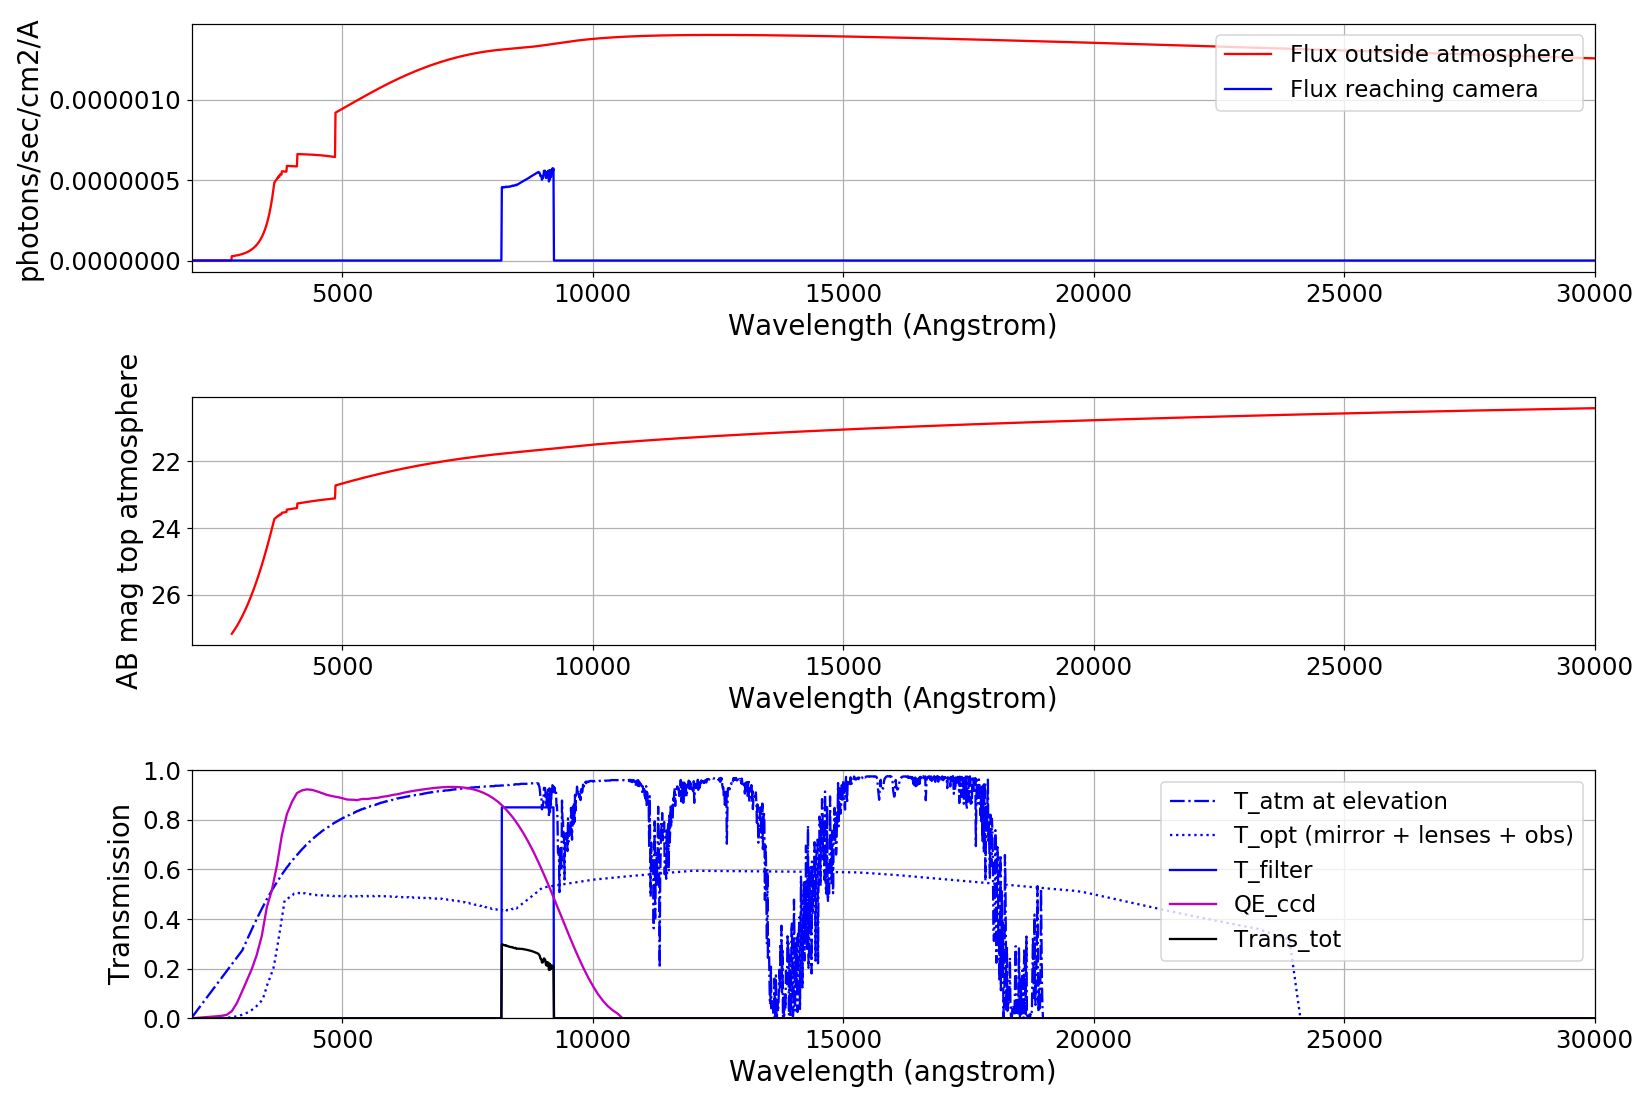

In [16]:
#Execute
COLIBRI_ETC.sim()

## 3) Compute exposure time for a given SNR and magnitude or spectrum

Here we compute the exposure time to reach a magnitude of 18 (AB system) in z band with a SNR of 10 with the COLIBRI telescope.

In [17]:
# Specify that we want to compute the exposure time
COLIBRI_ETC.information['etc_type'] = 'time'

# For a given magnitude
COLIBRI_ETC.information['object_type'] = 'magnitude'

# Define the object magnitude 
COLIBRI_ETC.information['object_magnitude'] = 18

# Define the SNR
COLIBRI_ETC.information['SNR'] = 10

# Specify the channel
COLIBRI_ETC.information["channel"]= 'DDRAGO-R'

# Select the z filter band
COLIBRI_ETC.information["filter_band"] = 'z'

# Use AB system
COLIBRI_ETC.information['photometry_system'] = 'AB'

#If you do not want to display the plot:
COLIBRI_ETC.information['plot'] = False

In [18]:
# Execute
COLIBRI_ETC.sim()


Information about Passband:
----------------------------
Cut_on: 8185 angstroms
Effective wavelength: 8680 angstroms
Cut_off: 9223 angstroms

Airmass: 1.02

Seeing: 0.72

MEAN EFFICENCIES:
------------------
Obscuration: 0.801
Telescope: 0.559 (+obs: 0.448)
Instrument: 0.513
Optics (tel+inst): 0.287  (+obs: 0.230)
Filter: 0.850
Atmosphere: 0.929
Camera: 0.701
System: 0.287 (+obs: 0.230)

Zeropoint: 23.16 (AB mag)


Reaching a magnitude (AB system) of 18.00 in z band with a SNR of 10.00 requires:

	 - a Total exposure time of : 3.30 s



Reaching a magnitude (AB system) of 18.00 in z band with a SNR of 10.00 for the central pixel requires:


	 - a Total exposure time of : 3.54 s



Full well capacity of 1 pixel: 350000.00 (electrons)


--------- One pixel only------------------

Photo-electrons created: central pix for 3 exposure(s) of 1.18 sec 
	by:
	- Object:              71.37   (electrons)
	- Sky:                 17.27   (electrons)
	- Readout:              8.00   (electrons)
	- Da

## 4) Compute limiting magnitudes

Here we want to compute the limiting magnitude for a SNR = 10 and 3 exposures of 10s in r band with the COLIBRI telescope.

In [19]:
# Specify that we want to compute the exposure time
COLIBRI_ETC.information['etc_type'] = 'mag'

# Define the SNR
COLIBRI_ETC.information['SNR'] = 10

# Modify the exposure time
COLIBRI_ETC.information["exptime"] = 10

# Change the number of expositions
COLIBRI_ETC.information['Nexp'] = 3

# Change the seeing at the zenith, in arcseconds
COLIBRI_ETC.information["seeing_zenith"] = 0.79

#Change the age of the moon
COLIBRI_ETC.information["moon_age"] = 7

# Specify the channel
COLIBRI_ETC.information["channel"]= 'DDRAGO-B'

# Select the z filter band
COLIBRI_ETC.information["filter_band"] = 'r'

# Use AB system
COLIBRI_ETC.information['photometry_system'] = 'AB'

#If you do not want to display the plot:
COLIBRI_ETC.information['plot'] = False

In [20]:
COLIBRI_ETC.sim()


Information about Passband:
----------------------------
Cut_on: 5495 angstroms
Effective wavelength: 6199 angstroms
Cut_off: 6895 angstroms

Airmass: 1.02

Seeing: 0.77

MEAN EFFICENCIES:
------------------
Obscuration: 0.801
Telescope: 0.569 (+obs: 0.456)
Instrument: 0.666
Optics (tel+inst): 0.379  (+obs: 0.304)
Filter: 0.850
Atmosphere: 0.887
Camera: 0.907
System: 0.379 (+obs: 0.304)

Zeropoint: 24.12 (AB mag)


For a total SNR=10.00 in a total exposure time of 30.00 (sec) in 3 exposure(s) we reach:

	 - a magnitude (AB system) of: 21.38 in r band



For the central pixel a SNR=10.00 in a total exposure time of 30.00 (sec) in 3 exposure(s) we reach:


	 - a magnitude (AB system) of: 21.47 in r band



Full well capacity of 1 pixel: 350000.00 (electrons)


--------- One pixel only------------------

Photo-electrons created: central pix for 3 exposure(s) of 10.00 sec 
	by:
	- Object:              89.10   (electrons)
	- Sky:                 84.88   (electrons)
	- Readout:             

## 5) Other

In [21]:
# If you do not want to display verbose:
COLIBRI_ETC.information['verbose'] = False

# If you do not want to create plots:
COLIBRI_ETC.information['plot'] = False


In [22]:
# Write system transmission of the last run in a file named 'sys_trans.txt' with wavelength in nm
COLIBRI_ETC.write_file_trans(COLIBRI_ETC.information['system_response'],'sys_trans',wvl_unit='nm')

<IPython.core.display.Javascript object>


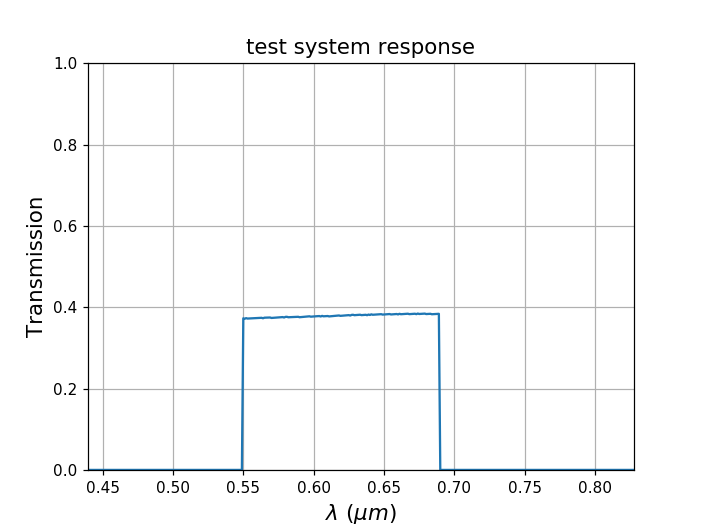

In [23]:
# Plot system transmission  of last run
trans=COLIBRI_ETC.information['system_response']
COLIBRI_ETC.plot_trans(trans,'system_transmision',title='test system response',ylabel='Transmission',
                   ylim=[0,1],wvl_unit='microns',passband_centered=True)